<a href="https://colab.research.google.com/github/jason96819/Classification-of-soccer-player-types/blob/main/Data%20collection%2C%20refining%2C%20and%20preprocessing/6_%EA%B3%B5%EA%B2%A9%EC%88%98_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('4_군집화데이터진짜최종.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,BP,CP,AP,...,RS,Takkle,Clearing,Intercept,Cut,Acq,Block,Foul,Fouled,Position
0,0.466321,0.000000,1.709845,0.466321,2.487047,0.155440,3.730570,2.953368,7.461140,7.150259,...,1.865285,1.554404,0.466321,0.932642,0.932642,3.730570,1.243523,1.709845,1.554404,FW
1,0.110906,0.000000,0.665434,0.000000,0.332717,0.443623,7.652495,5.988909,4.879852,4.658041,...,1.885397,1.441774,0.998152,1.552680,1.552680,4.325323,1.663586,1.219963,1.109057,MF
2,0.219045,0.237298,1.168239,0.091269,0.839671,1.423791,5.348342,5.968969,7.885610,9.309401,...,0.748403,1.515059,0.401582,0.638880,0.529358,3.650745,0.821418,0.419836,0.365075,FW
3,0.000000,0.020401,0.428426,0.000000,0.142809,0.183611,7.997280,5.406324,11.934716,3.835430,...,2.019721,1.489289,2.366542,2.040122,1.509691,4.386263,1.958518,0.775247,0.693642,MF
4,0.000000,0.086455,0.778098,0.086455,0.432277,0.345821,14.351585,7.175793,11.412104,7.780980,...,1.556196,1.642651,0.864553,1.902017,1.210375,6.397695,1.556196,0.951009,1.469741,MF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,0.000000,0.210526,0.000000,3.368421,0.421053,0.842105,21.894737,8.631579,14.736842,9.894737,...,0.842105,0.210526,1.052632,0.631579,2.526316,5.684211,0.421053,0.421053,0.631579,DF
1697,0.179533,0.215440,0.969479,0.000000,1.256732,1.077199,5.242370,5.421903,9.479354,10.771993,...,2.728905,0.466786,0.215440,1.041293,1.077199,3.806104,0.000000,1.041293,0.718133,FW
1698,0.024430,0.000000,0.268730,0.048860,0.024430,0.097720,14.193811,1.954397,12.996743,0.464169,...,2.956026,0.537459,1.758958,1.294788,3.273616,5.399023,0.366450,1.026059,0.439739,DF
1699,0.000000,0.000000,0.096154,4.423077,0.288462,0.000000,15.480769,8.173077,8.653846,7.115385,...,0.673077,0.192308,0.384615,0.673077,1.826923,3.942308,0.000000,1.442308,0.769231,DF


# 공격수 군집화

## 중앙 측면 군집화

In [ ]:
FW = df[df['Position'] == 'FW']
FW

,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,BP,CP,AP,...,RS,Takkle,Clearing,Intercept,Cut,Acq,Block,Foul,Fouled,Position
0,0.466321,0.000000,1.709845,0.466321,2.487047,0.155440,3.730570,2.953368,7.461140,7.150259,...,1.865285,1.554404,0.466321,0.932642,0.932642,3.730570,1.243523,1.709845,1.554404,FW
2,0.219045,0.237298,1.168239,0.091269,0.839671,1.423791,5.348342,5.968969,7.885610,9.309401,...,0.748403,1.515059,0.401582,0.638880,0.529358,3.650745,0.821418,0.419836,0.365075,FW
8,0.153061,0.030612,0.918367,0.030612,0.153061,0.214286,4.071429,5.908163,6.704082,6.734694,...,8.204082,0.214286,0.428571,0.397959,0.061224,2.326531,0.428571,0.765306,0.948980,FW
12,0.454545,0.000000,1.818182,0.000000,0.000000,1.363636,7.045455,5.454545,5.227273,5.681818,...,10.681818,1.590909,1.363636,0.681818,0.454545,2.954545,0.227273,1.136364,1.363636,FW
16,0.196721,0.000000,1.672131,0.000000,1.081967,0.196721,3.344262,3.737705,4.622951,3.737705,...,7.278689,0.688525,0.590164,0.393443,0.295082,1.868852,0.295082,1.278689,0.590164,FW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,0.475594,0.150188,1.777222,0.000000,0.200250,0.826033,5.431790,5.607009,6.858573,7.684606,...,5.556946,0.225282,0.575720,0.350438,1.026283,2.152691,0.100125,1.526909,1.076345,FW
1691,0.000000,0.058423,1.343720,0.876339,0.175268,0.116845,5.082765,5.374878,5.608569,5.550146,...,0.759494,0.584226,0.058423,0.467381,1.752678,3.739046,0.000000,0.642648,0.350536,FW
1694,0.048038,0.192154,0.912730,1.200961,0.336269,0.960769,5.956765,12.153723,11.385108,13.114492,...,1.681345,0.528423,0.336269,0.576461,1.585268,3.795036,0.000000,0.816653,1.248999,FW
1695,0.289157,0.173494,1.503614,0.838554,0.751807,0.809639,6.014458,6.737349,8.443373,10.554217,...,1.648193,0.231325,0.028916,0.693976,1.012048,3.527711,0.028916,0.636145,1.387952,FW


In [ ]:
temp_FW = FW[['Dribble', 'Cross']]
temp_FW

,Dribble,Cross
0,2.487047,0.621762
2,0.839671,5.311834
8,0.153061,0.459184
12,0.000000,0.454545
16,1.081967,0.491803
...,...,...
1685,0.200250,0.575720
1691,0.175268,1.285297
1694,0.336269,3.122498
1695,0.751807,1.474699


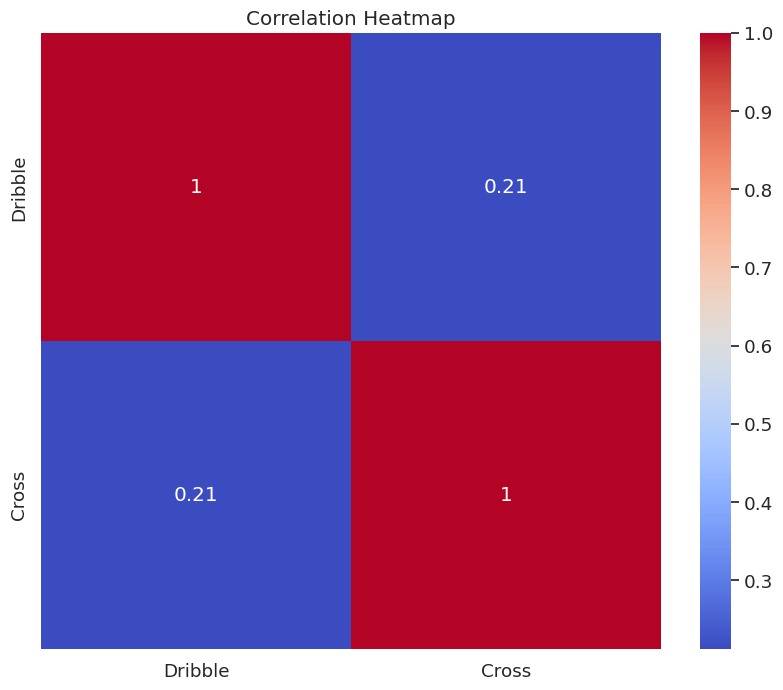

In [ ]:
# 상관관계 분석
corr = temp_FW.corr()

# 히트맵 그리기
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

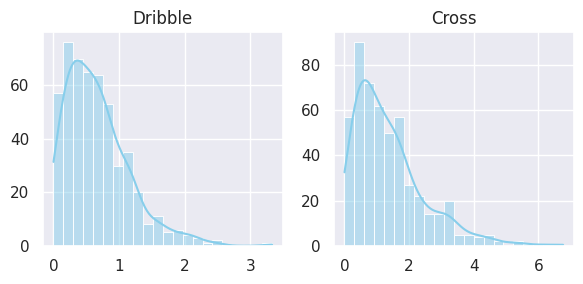

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(temp_FW.columns):
    sns.histplot(data=temp_FW[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# 제곱근 변환 함수 정의
def sqrt_transform(x):
    return np.sqrt(x)

In [ ]:
for i in range(len(temp_FW.columns)):
    temp_FW[temp_FW.columns[i]] = temp_FW[temp_FW.columns[i]].apply(sqrt_transform)

<ipython-input-7-4aa583592895>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_FW[temp_FW.columns[i]] = temp_FW[temp_FW.columns[i]].apply(sqrt_transform)


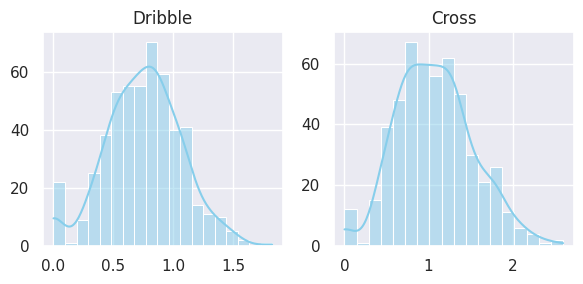

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(temp_FW.columns):
    sns.histplot(data=temp_FW[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km_FW = KMeans(n_clusters=2)
km_FW.fit(temp_FW)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
FW['Role'] = km_FW.labels_

<ipython-input-25-80ab4ee8c83b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FW['Role'] = km_FW.labels_


In [ ]:
temp_FW['Role'] = km_FW.labels_

<ipython-input-10-190edaad6148>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_FW['Role'] = km_FW.labels_


In [ ]:
temp_FW

,Dribble,Cross,Role
0,1.577037,0.788519,1
2,0.916336,2.304742,1
8,0.391230,0.677631,0
12,0.000000,0.674200,0
16,1.040177,0.701287,0
...,...,...,...
1685,0.447493,0.758762,0
1691,0.418650,1.133709,0
1694,0.579887,1.767059,1
1695,0.867068,1.214372,1


In [ ]:
temp_FW[temp_FW['Role']==0].describe()                                                                                                  #CF

,Dribble,Cross,Role
count,263.000000,263.000000,263.0
mean,0.608440,0.727734,0.0
std,0.283137,0.257040,0.0
min,0.000000,0.000000,0.0
25%,0.444930,0.574961,0.0
50%,0.619868,0.748831,0.0
75%,0.814761,0.921009,0.0
max,1.508271,1.241732,0.0


In [ ]:
temp_FW[temp_FW['Role']==1].describe()                                                                                                  #WF

,Dribble,Cross,Role
count,248.000000,248.000000,248.0
mean,0.899077,1.445073,1.0
std,0.282639,0.317726,0.0
min,0.000000,0.788519,1.0
25%,0.727795,1.227390,1.0
50%,0.882735,1.355699,1.0
75%,1.083307,1.634379,1.0
max,1.825742,2.601073,1.0


In [ ]:
temp_FW['Role'][temp_FW['Role'] == 0] = 'CF'
temp_FW['Role'][temp_FW['Role'] == 1] = 'WF'

<ipython-input-14-1c930b0917cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_FW['Role'][temp_FW['Role'] == 0] = 'CF'
<ipython-input-14-1c930b0917cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_FW['Role'][temp_FW['Role'] == 0] = 'CF'
<ipython-input-14-1c930b0917cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_FW['Role'][temp_FW['Role'] == 1] = 'WF'
<ipython-input-14-1c930b0917cd>:2: SettingWithCopyWarning: 
A

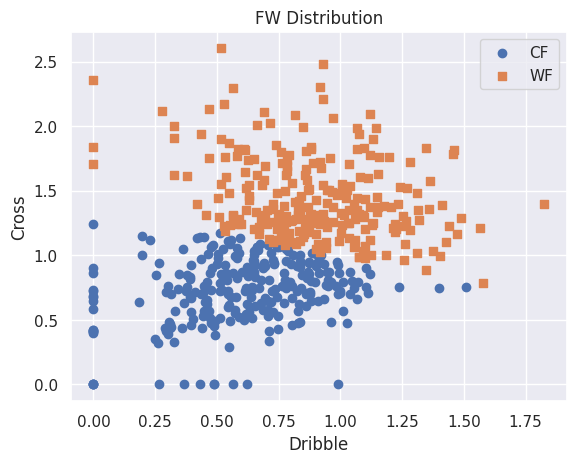

In [ ]:
# 군집 값이 0, 1인 경우마다 별도의 인덱스 추출
marker0 = temp_FW[temp_FW['Role']=='CF'].index
marker1 = temp_FW[temp_FW['Role']=='WF'].index

# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 Throw, Cross 값 추출.
plt.scatter(x=temp_FW.loc[marker0, 'Dribble'], y=temp_FW.loc[marker0, 'Cross'], marker='o', label='CF')
plt.scatter(x=temp_FW.loc[marker1, 'Dribble'], y=temp_FW.loc[marker1, 'Cross'], marker='s', label='WF')

plt.xlabel('Dribble')
plt.ylabel('Cross')
plt.title('FW Distribution')
plt.legend()
plt.show()

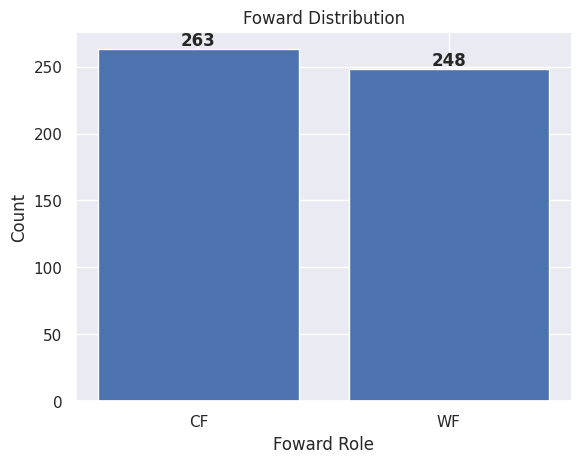

In [ ]:
sns.set(style='darkgrid')

counts = temp_FW['Role'].value_counts().loc[['CF', 'WF']]

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)

for i, v in enumerate(counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.title('Foward Distribution')
plt.xlabel('Foward Role')
plt.ylabel('Count')
plt.show()

## 실루엣 계수

In [ ]:
temp_FW

,Dribble,Cross,Role
0,1.577037,0.788519,WF
2,0.916336,2.304742,WF
8,0.391230,0.677631,CF
12,0.000000,0.674200,CF
16,1.040177,0.701287,CF
...,...,...,...
1685,0.447493,0.758762,CF
1691,0.418650,1.133709,CF
1694,0.579887,1.767059,WF
1695,0.867068,1.214372,WF


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
score_samples = silhouette_samples(temp_FW[['Dribble', 'Cross']], temp_FW['Role'])
score_samples.shape

(511,)

In [ ]:
temp_FW['silhouette_coeff'] = score_samples
average_score = silhouette_score(temp_FW[['Dribble', 'Cross']], temp_FW['Role'])
np.round(average_score, 4)

<ipython-input-21-b356de80ddfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_FW['silhouette_coeff'] = score_samples


0.4111

In [ ]:
temp_FW.groupby('Role')['silhouette_coeff'].mean()

Role
CF    0.439331
WF    0.381116
Name: silhouette_coeff, dtype: float64

In [ ]:
FW

,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,BP,CP,AP,...,RS,Takkle,Clearing,Intercept,Cut,Acq,Block,Foul,Fouled,Position
0,0.466321,0.000000,1.709845,0.466321,2.487047,0.155440,3.730570,2.953368,7.461140,7.150259,...,1.865285,1.554404,0.466321,0.932642,0.932642,3.730570,1.243523,1.709845,1.554404,FW
2,0.219045,0.237298,1.168239,0.091269,0.839671,1.423791,5.348342,5.968969,7.885610,9.309401,...,0.748403,1.515059,0.401582,0.638880,0.529358,3.650745,0.821418,0.419836,0.365075,FW
8,0.153061,0.030612,0.918367,0.030612,0.153061,0.214286,4.071429,5.908163,6.704082,6.734694,...,8.204082,0.214286,0.428571,0.397959,0.061224,2.326531,0.428571,0.765306,0.948980,FW
12,0.454545,0.000000,1.818182,0.000000,0.000000,1.363636,7.045455,5.454545,5.227273,5.681818,...,10.681818,1.590909,1.363636,0.681818,0.454545,2.954545,0.227273,1.136364,1.363636,FW
16,0.196721,0.000000,1.672131,0.000000,1.081967,0.196721,3.344262,3.737705,4.622951,3.737705,...,7.278689,0.688525,0.590164,0.393443,0.295082,1.868852,0.295082,1.278689,0.590164,FW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,0.475594,0.150188,1.777222,0.000000,0.200250,0.826033,5.431790,5.607009,6.858573,7.684606,...,5.556946,0.225282,0.575720,0.350438,1.026283,2.152691,0.100125,1.526909,1.076345,FW
1691,0.000000,0.058423,1.343720,0.876339,0.175268,0.116845,5.082765,5.374878,5.608569,5.550146,...,0.759494,0.584226,0.058423,0.467381,1.752678,3.739046,0.000000,0.642648,0.350536,FW
1694,0.048038,0.192154,0.912730,1.200961,0.336269,0.960769,5.956765,12.153723,11.385108,13.114492,...,1.681345,0.528423,0.336269,0.576461,1.585268,3.795036,0.000000,0.816653,1.248999,FW
1695,0.289157,0.173494,1.503614,0.838554,0.751807,0.809639,6.014458,6.737349,8.443373,10.554217,...,1.648193,0.231325,0.028916,0.693976,1.012048,3.527711,0.028916,0.636145,1.387952,FW


In [ ]:
FW['Role'][FW['Role'] == 0] = 'CF'
FW['Role'][FW['Role'] == 1] = 'WF'
FW

<ipython-input-26-0360d9628c54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FW['Role'][FW['Role'] == 0] = 'CF'
<ipython-input-26-0360d9628c54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FW['Role'][FW['Role'] == 0] = 'CF'
<ipython-input-26-0360d9628c54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FW['Role'][FW['Role'] == 1] = 'WF'
<ipython-input-26-0360d9628c54>:2: SettingWithCopyWarning: 
A value is trying to be set on 

,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,BP,CP,AP,...,Takkle,Clearing,Intercept,Cut,Acq,Block,Foul,Fouled,Position,Role
0,0.466321,0.000000,1.709845,0.466321,2.487047,0.155440,3.730570,2.953368,7.461140,7.150259,...,1.554404,0.466321,0.932642,0.932642,3.730570,1.243523,1.709845,1.554404,FW,WF
2,0.219045,0.237298,1.168239,0.091269,0.839671,1.423791,5.348342,5.968969,7.885610,9.309401,...,1.515059,0.401582,0.638880,0.529358,3.650745,0.821418,0.419836,0.365075,FW,WF
8,0.153061,0.030612,0.918367,0.030612,0.153061,0.214286,4.071429,5.908163,6.704082,6.734694,...,0.214286,0.428571,0.397959,0.061224,2.326531,0.428571,0.765306,0.948980,FW,CF
12,0.454545,0.000000,1.818182,0.000000,0.000000,1.363636,7.045455,5.454545,5.227273,5.681818,...,1.590909,1.363636,0.681818,0.454545,2.954545,0.227273,1.136364,1.363636,FW,CF
16,0.196721,0.000000,1.672131,0.000000,1.081967,0.196721,3.344262,3.737705,4.622951,3.737705,...,0.688525,0.590164,0.393443,0.295082,1.868852,0.295082,1.278689,0.590164,FW,CF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,0.475594,0.150188,1.777222,0.000000,0.200250,0.826033,5.431790,5.607009,6.858573,7.684606,...,0.225282,0.575720,0.350438,1.026283,2.152691,0.100125,1.526909,1.076345,FW,CF
1691,0.000000,0.058423,1.343720,0.876339,0.175268,0.116845,5.082765,5.374878,5.608569,5.550146,...,0.584226,0.058423,0.467381,1.752678,3.739046,0.000000,0.642648,0.350536,FW,CF
1694,0.048038,0.192154,0.912730,1.200961,0.336269,0.960769,5.956765,12.153723,11.385108,13.114492,...,0.528423,0.336269,0.576461,1.585268,3.795036,0.000000,0.816653,1.248999,FW,WF
1695,0.289157,0.173494,1.503614,0.838554,0.751807,0.809639,6.014458,6.737349,8.443373,10.554217,...,0.231325,0.028916,0.693976,1.012048,3.527711,0.028916,0.636145,1.387952,FW,WF


# CF 역할 군집

- Finisher : 슛 기회를 찾는 데 중점을 둠
- Target : 팀의 빌드업에 관여하며, 공중볼이나 앞에 떨어지는 공에 관여
- Roamer : 공을 오래 소유하며 공격하지 않을 때 내려오거나 공간을 벌려주기를 즐겨하는 선수

필요한 속성 = Goal, Shoot, Pass, RG, RS, MP, DP, LP, CP

In [ ]:
CF = FW[FW['Role'] == 'CF']

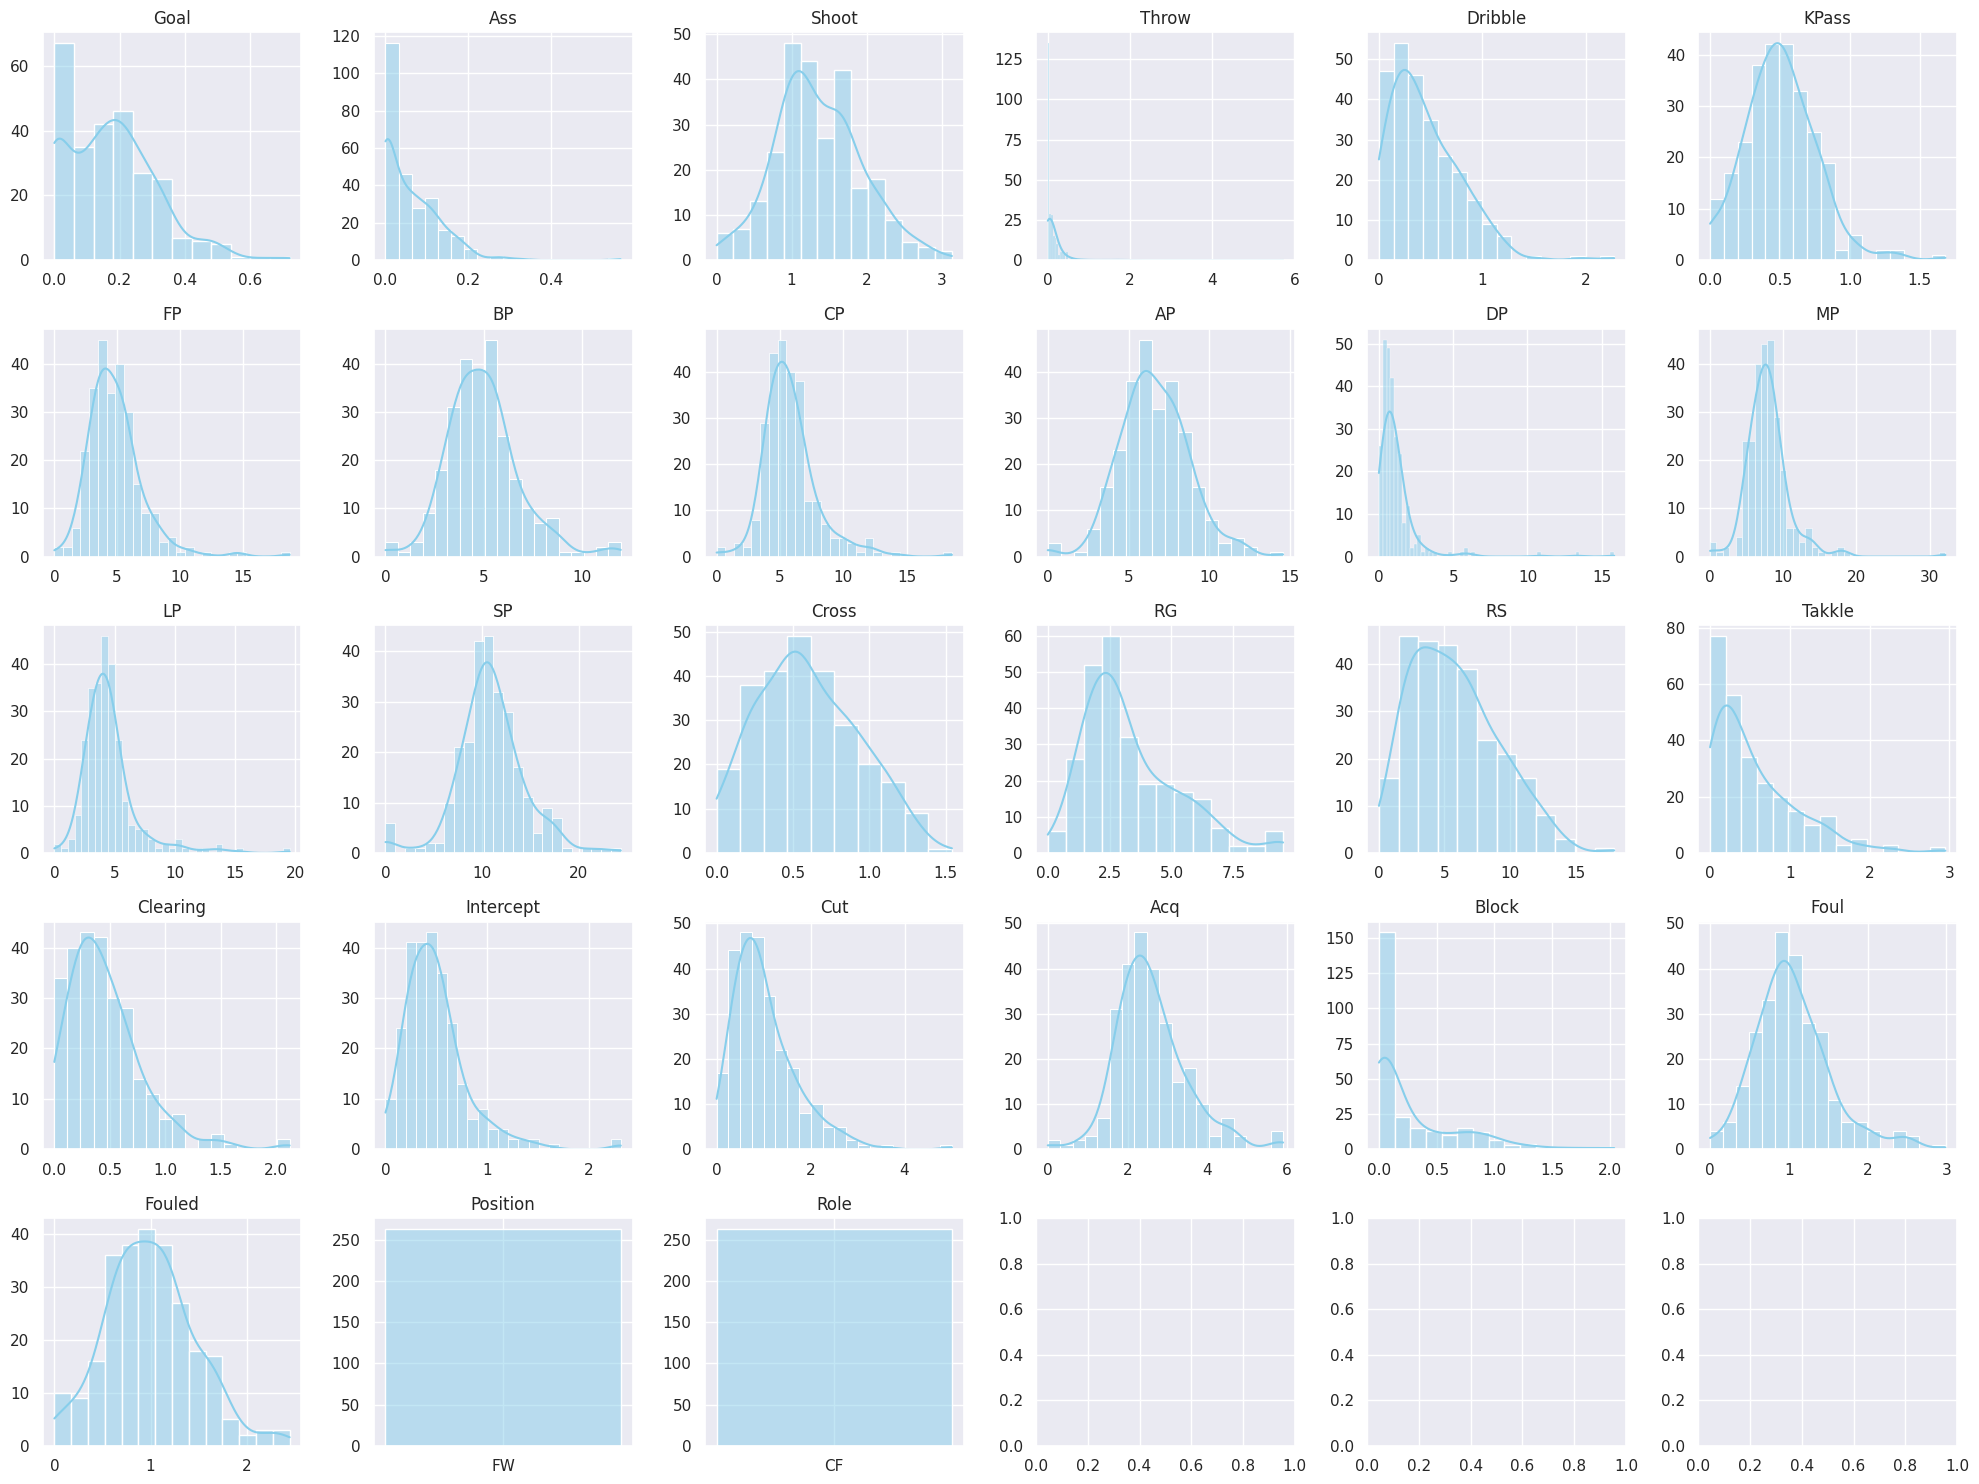

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(CF.columns):
    sns.histplot(data=CF[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
CF = FW[FW['Role'] == 'CF']
temp1 = CF[['CP', 'MP']]
temp1

,CP,MP
8,6.704082,9.030612
12,5.227273,11.818182
16,4.622951,7.672131
25,4.588235,7.714286
33,5.240175,8.384279
...,...,...
1666,5.953408,10.094909
1678,4.323953,7.577213
1680,4.410983,6.749336
1685,6.858573,9.637046


### 정규화

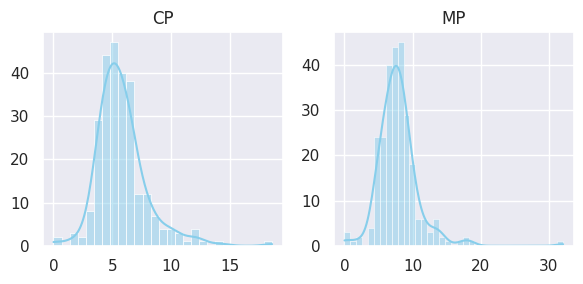

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(temp1.columns):
    sns.histplot(data=temp1[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
for i in range(len(temp1.columns)):
    temp1[temp1.columns[i]] = temp1[temp1.columns[i]].apply(sqrt_transform)

<ipython-input-60-8211c4c8e08e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1[temp1.columns[i]] = temp1[temp1.columns[i]].apply(sqrt_transform)


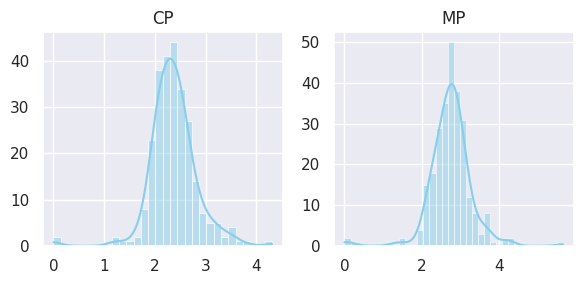

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(temp1.columns):
    sns.histplot(data=temp1[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

### 차원축소

- Finisher : 슛 기회를 찾는 데 중점을 둠
- Target : 팀의 빌드업에 관여하며, 공중볼이나 앞에 떨어지는 공에 관여
- Roamer : 공을 오래 소유하며 공격하지 않을 때 내려오거나 공간을 벌려주기를 즐겨하는 선수

In [ ]:
finisher = temp_CF[['Goal', 'Shoot']]
target = temp_CF[['AP', 'RG', 'RS']]
roamer = temp_CF[['MP', 'DP', 'LP', 'CP']]

In [ ]:
temp1 = temp_CF
temp1 = temp_CF.drop(columns=temp_CF.columns)

In [ ]:
temp_list = [finisher, target, roamer]

for i, pos in zip(temp_list, ['finisher', 'target', 'roamer']):
    pca = PCA(n_components=1)

    pca.fit(i)
    pca_result = pca.transform(i)

    # 새로운 변수에 저장
    temp1[f"{pos}_pca"] = pca_result

In [ ]:
temp1

,finisher_pca,target_pca,roamer_pca
8,-0.417293,0.116700,0.260176
12,0.523743,-0.907684,0.270490
16,0.327805,-2.831908,-0.392107
25,-0.183226,-2.082768,0.035576
33,0.640021,-0.050815,0.038078
...,...,...,...
1666,-0.439606,-1.096258,0.501773
1678,-0.072986,-0.180506,-0.501560
1680,0.566287,0.480331,-0.420961
1685,0.487527,1.059476,0.341481


### 군집화

In [ ]:
km_CF = KMeans(n_clusters=2)
km_CF.fit(temp1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
CF['Detailed Role'] = km_CF.labels_

<ipython-input-85-f85c733e4a01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CF['Detailed Role'] = km_CF.labels_


In [ ]:
temp1['Detailed Role'] = km_CF.labels_

<ipython-input-63-47cae1e842e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Detailed Role'] = km_CF.labels_


In [ ]:
temp1[temp1['Detailed Role']==0].describe()                                                                                             # not Roamer

,CP,MP,Detailed Role
count,149.000000,149.000000,149.0
mean,2.118771,2.451065,0.0
std,0.353166,0.444868,0.0
min,0.000000,0.000000,0.0
25%,2.007313,2.320562,0.0
50%,2.154271,2.533330,0.0
75%,2.298826,2.706321,0.0
max,2.819644,3.029269,0.0


In [ ]:
temp1[temp1['Detailed Role']==1].describe()                                                                                             # Roamer

,CP,MP,Detailed Role
count,114.000000,114.000000,114.0
mean,2.692469,3.146758,1.0
std,0.367761,0.414930,0.0
min,2.074560,2.631514,1.0
25%,2.443721,2.897617,1.0
50%,2.601391,3.039798,1.0
75%,2.833502,3.245855,1.0
max,4.309690,5.669203,1.0


In [ ]:
temp1['Detailed Role'][temp1['Detailed Role']==0] = 'not Roamer'
temp1['Detailed Role'][temp1['Detailed Role']==1] = 'Roamer'

<ipython-input-66-965098c39f56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Detailed Role'][temp1['Detailed Role']==0] = 'not Roamer'
<ipython-input-66-965098c39f56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Detailed Role'][temp1['Detailed Role']==0] = 'not Roamer'
<ipython-input-66-965098c39f56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Detailed Role'][temp1['Detailed Role']==1] = 'Roamer'
<ipyt

In [ ]:
temp1

,CP,MP,Detailed Role
8,2.589224,3.005098,Roamer
12,2.286323,3.437758,Roamer
16,2.150105,2.769861,not Roamer
25,2.142017,2.777460,not Roamer
33,2.289143,2.895562,Roamer
...,...,...,...
1666,2.439961,3.177249,Roamer
1678,2.079412,2.752674,not Roamer
1680,2.100234,2.597948,not Roamer
1685,2.618888,3.104359,Roamer


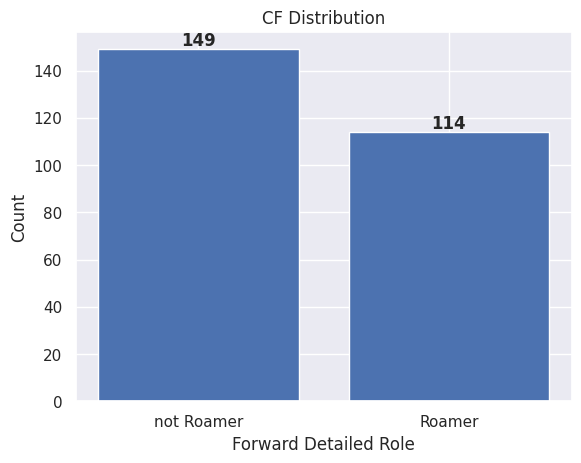

In [ ]:
sns.set(style='darkgrid')

counts = temp1['Detailed Role'].value_counts().loc[['not Roamer', 'Roamer']]

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)

for i, v in enumerate(counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.title('CF Distribution')
plt.xlabel('Forward Detailed Role')
plt.ylabel('Count')
plt.show()

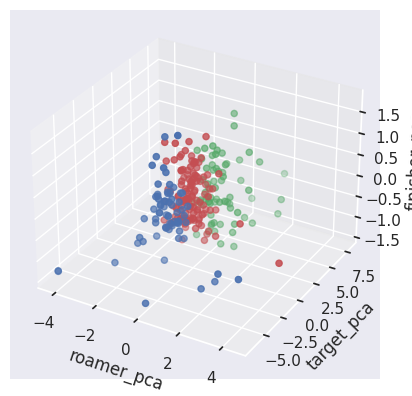

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = temp1['roamer_pca']
y = temp1['target_pca']
z = temp1['finisher_pca']
colors = np.where(temp1['Detailed Role'] == 0, 'r', np.where(temp1['Detailed Role'] == 1, 'g', 'b'))

ax.scatter(x, y, z, c=colors)

ax.set_xlabel('roamer_pca')
ax.set_ylabel('target_pca')
ax.set_zlabel('finisher_pca')

plt.show()

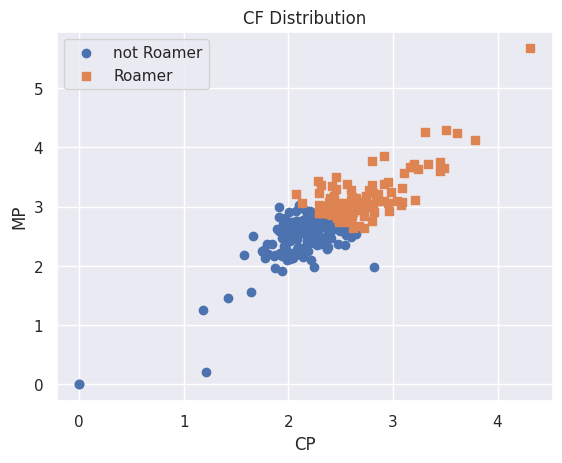

In [ ]:
# 군집 값이 0, 1인 경우마다 별도의 인덱스 추출
marker0 = temp1[temp1['Detailed Role']=='not Roamer'].index
marker1 = temp1[temp1['Detailed Role']=='Roamer'].index


# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 Throw, Cross 값 추출.
plt.scatter(x=temp1.loc[marker0, 'CP'], y=temp1.loc[marker0, 'MP'], marker='o', label='not Roamer')
plt.scatter(x=temp1.loc[marker1, 'CP'], y=temp1.loc[marker1, 'MP'], marker='s', label='Roamer')

plt.xlabel('CP')
plt.ylabel('MP')
plt.title('CF Distribution')
plt.legend()
plt.show()

In [ ]:
a = temp1[temp1['Detailed Role']=='Roamer']
a

,CP,MP,Detailed Role
8,2.589224,3.005098,Roamer
12,2.286323,3.437758,Roamer
33,2.289143,2.895562,Roamer
46,2.966954,2.919097,Roamer
49,2.914115,3.098899,Roamer
...,...,...,...
1634,3.074824,3.035148,Roamer
1655,2.611498,2.903294,Roamer
1656,2.467082,2.807206,Roamer
1666,2.439961,3.177249,Roamer


In [ ]:
b = temp1[temp1['Detailed Role']=='not Roamer']
b

,CP,MP,Detailed Role
16,2.150105,2.769861,not Roamer
25,2.142017,2.777460,not Roamer
36,2.600498,2.487378,not Roamer
44,1.763562,2.262474,not Roamer
45,2.285135,2.718914,not Roamer
...,...,...,...
1654,2.393414,2.755989,not Roamer
1664,2.540003,2.581989,not Roamer
1678,2.079412,2.752674,not Roamer
1680,2.100234,2.597948,not Roamer


## 실루엣 계수

In [ ]:
temp1

,CP,MP,Detailed Role
8,2.589224,3.005098,Roamer
12,2.286323,3.437758,Roamer
16,2.150105,2.769861,not Roamer
25,2.142017,2.777460,not Roamer
33,2.289143,2.895562,Roamer
...,...,...,...
1666,2.439961,3.177249,Roamer
1678,2.079412,2.752674,not Roamer
1680,2.100234,2.597948,not Roamer
1685,2.618888,3.104359,Roamer


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
score_samples = silhouette_samples(temp1[['CP', 'MP']], temp1['Detailed Role'])
score_samples.shape

(263,)

In [ ]:
temp1['silhouette_coeff'] = score_samples
average_score = silhouette_score(temp1[['CP', 'MP']], temp1['Detailed Role'])
np.round(average_score, 4)

<ipython-input-80-3e70273b56cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['silhouette_coeff'] = score_samples


0.3893

In [ ]:
temp1.groupby('Detailed Role')['silhouette_coeff'].mean()

Detailed Role
Roamer        0.357986
not Roamer    0.413276
Name: silhouette_coeff, dtype: float64

In [ ]:
b = CF[CF['Detailed Role']==0]

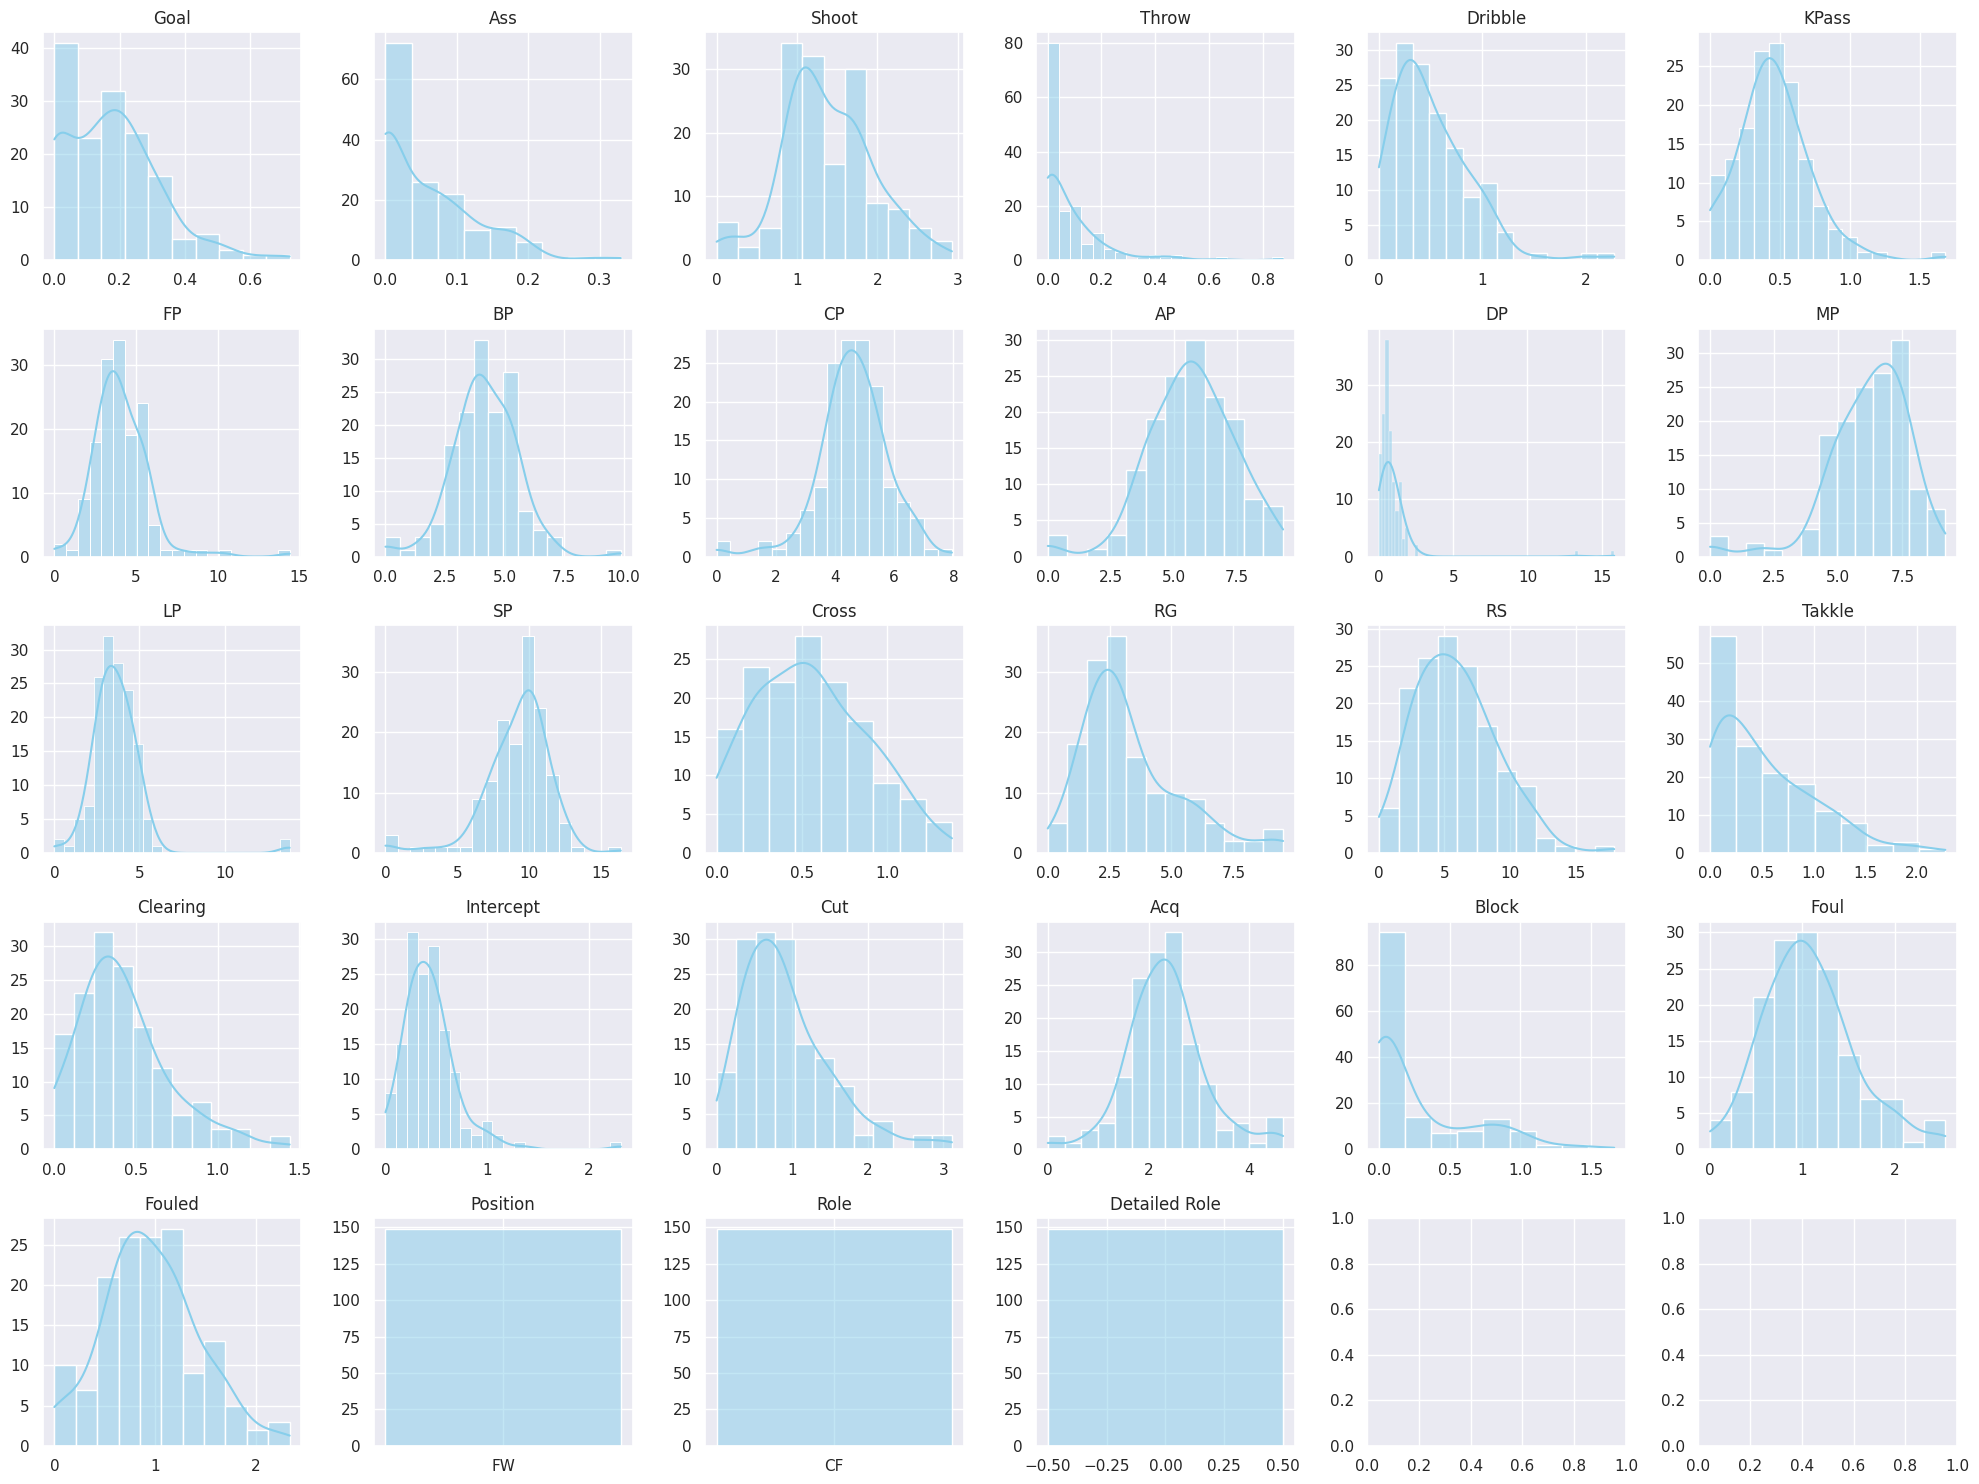

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(b.columns):
    sns.histplot(data=b[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
c = b[['RG', 'RS']]

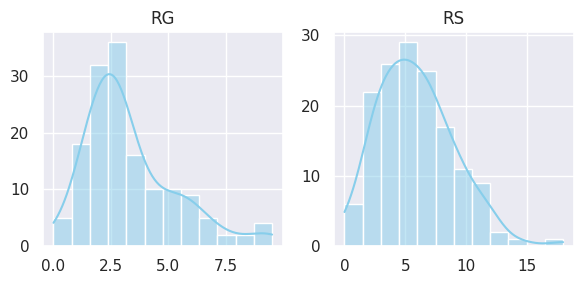

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(c.columns):
    sns.histplot(data=c[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
for i in range(len(c.columns)):
    c[c.columns[i]] = c[c.columns[i]].apply(sqrt_transform)

<ipython-input-93-3127d7dfedb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c[c.columns[i]] = c[c.columns[i]].apply(sqrt_transform)


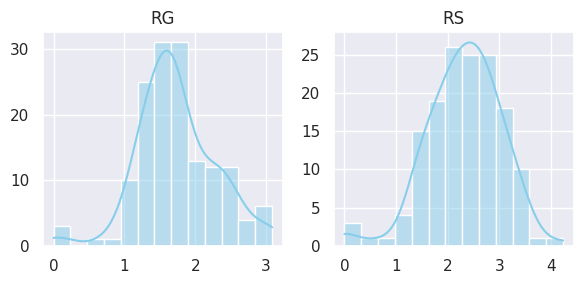

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(c.columns):
    sns.histplot(data=c[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

### 군집화

In [ ]:
km_CF = KMeans(n_clusters=2)
km_CF.fit(c)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
c['Detailed Role'] = km_CF.labels_

<ipython-input-96-0ec1b931f8e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['Detailed Role'] = km_CF.labels_


In [ ]:
c[c['Detailed Role']==0].describe()                                                                                             # target

,RG,RS,Detailed Role
count,81.000000,81.000000,81.0
mean,1.806969,2.825293,0.0
std,0.439820,0.391872,0.0
min,1.073235,2.261919,0.0
25%,1.503202,2.547423,0.0
50%,1.705136,2.749046,0.0
75%,2.102048,3.076096,0.0
max,2.915032,4.236027,0.0


In [ ]:
c[c['Detailed Role']==1].describe()                                                                                             # finisher

,RG,RS,Detailed Role
count,68.000000,68.000000,68.0
mean,1.653704,1.713224,1.0
std,0.652148,0.512029,0.0
min,0.000000,0.000000,1.0
25%,1.264860,1.526457,1.0
50%,1.607208,1.826554,1.0
75%,1.992149,2.070700,1.0
max,3.083843,2.305951,1.0


In [ ]:
c['Detailed Role'][c['Detailed Role']==0] = 'Target'
c['Detailed Role'][c['Detailed Role']==1] = 'Finisher'

<ipython-input-99-da94c8e8bbc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['Detailed Role'][c['Detailed Role']==0] = 'Target'
<ipython-input-99-da94c8e8bbc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['Detailed Role'][c['Detailed Role']==0] = 'Target'
<ipython-input-99-da94c8e8bbc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['Detailed Role'][c['Detailed Role']==1] = 'Finisher'
<ipython-input-99-da94c8e8bbc2>:2: 

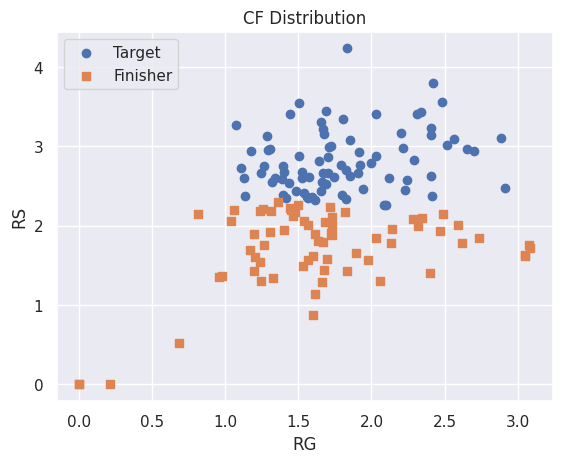

In [ ]:
# 군집 값이 0, 1인 경우마다 별도의 인덱스 추출
marker0 = c[c['Detailed Role']=='Target'].index
marker1 = c[c['Detailed Role']=='Finisher'].index


# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 Throw, Cross 값 추출.
plt.scatter(x=c.loc[marker0, 'RG'], y=c.loc[marker0, 'RS'], marker='o', label='Target')
plt.scatter(x=c.loc[marker1, 'RG'], y=c.loc[marker1, 'RS'], marker='s', label='Finisher')

plt.xlabel('RG')
plt.ylabel('RS')
plt.title('CF Distribution')
plt.legend()
plt.show()

## 실루엣 계수

In [ ]:
c

,RG,RS,Detailed Role
16,1.828732,2.697904,Target
25,1.402279,1.944611,Finisher
36,1.563983,2.007181,Finisher
44,1.247027,2.669725,Target
45,1.126776,2.607419,Target
...,...,...,...
1654,1.485431,2.437333,Target
1664,1.854956,3.076096,Target
1678,1.504968,2.884175,Target
1680,1.709661,2.996898,Target


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
score_samples = silhouette_samples(c[['RG', 'RS']], c['Detailed Role'])
score_samples.shape

(149,)

In [ ]:
c['silhouette_coeff'] = score_samples
average_score = silhouette_score(c[['RG', 'RS']], c['Detailed Role'])
np.round(average_score, 4)

<ipython-input-104-48bc99d6eb50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['silhouette_coeff'] = score_samples


0.354

In [ ]:
c.groupby('Detailed Role')['silhouette_coeff'].mean()

Detailed Role
Finisher    0.255210
Target      0.436843
Name: silhouette_coeff, dtype: float64

In [ ]:
c = c.reset_index()
c = c[['index', 'Detailed Role']]
c['Role'] = 'CF'
c

,index,Detailed Role,Role
0,16,Target,CF
1,25,Finisher,CF
2,36,Finisher,CF
3,44,Target,CF
4,45,Target,CF
...,...,...,...
144,1654,Target,CF
145,1664,Target,CF
146,1678,Target,CF
147,1680,Target,CF


In [ ]:
a = a.reset_index()
a = a[['index', 'Detailed Role']]
a['Role'] = 'CF'
a

,index,Detailed Role,Role
0,8,Roamer,CF
1,12,Roamer,CF
2,33,Roamer,CF
3,46,Roamer,CF
4,49,Roamer,CF
...,...,...,...
109,1634,Roamer,CF
110,1655,Roamer,CF
111,1656,Roamer,CF
112,1666,Roamer,CF


In [ ]:
cf = pd.concat([a, c])
cf = cf.sort_values(by='index')
cf = cf.set_index('index')
cf = cf.rename_axis(None)
cf = cf[['Role', 'Detailed Role']]
cf

,Role,Detailed Role
8,CF,Roamer
12,CF,Roamer
16,CF,Target
25,CF,Finisher
33,CF,Roamer
...,...,...
1666,CF,Roamer
1678,CF,Target
1680,CF,Target
1685,CF,Roamer


# 측면 공격수

- Wide Threat : 상대 수비 라인을 늘리며 패널티 박스로 들어감. 가끔 크로스도 올리지만, 슛 기회를 노린다.
- Unlokcer : 크로스, 전환 패스, 전진패스를 자주 한다. 침투 패스를 넣어주는 선수
- Outlet : 공 소유시 안정적인 플레이를 가져 감. 중원과 골문 근처에서 다수의 터치, 파울을 이끌어냄

필요한 속성 = AtP, Dribble, Shooting, Cross, CP, FP, Folued

In [ ]:
WF = FW[FW['Role'] == 'WF']
temp_WF = WF[['Goal', 'AP', 'Fouled']]
temp_WF

,Goal,AP,Fouled
0,0.466321,7.150259,1.554404
2,0.219045,9.309401,0.365075
19,0.164948,7.134021,0.845361
21,0.139427,5.646785,1.185128
24,0.000000,3.619490,1.252900
...,...,...,...
1673,0.000000,8.472076,1.643836
1677,0.000000,7.033195,1.431535
1694,0.048038,13.114492,1.248999
1695,0.289157,10.554217,1.387952


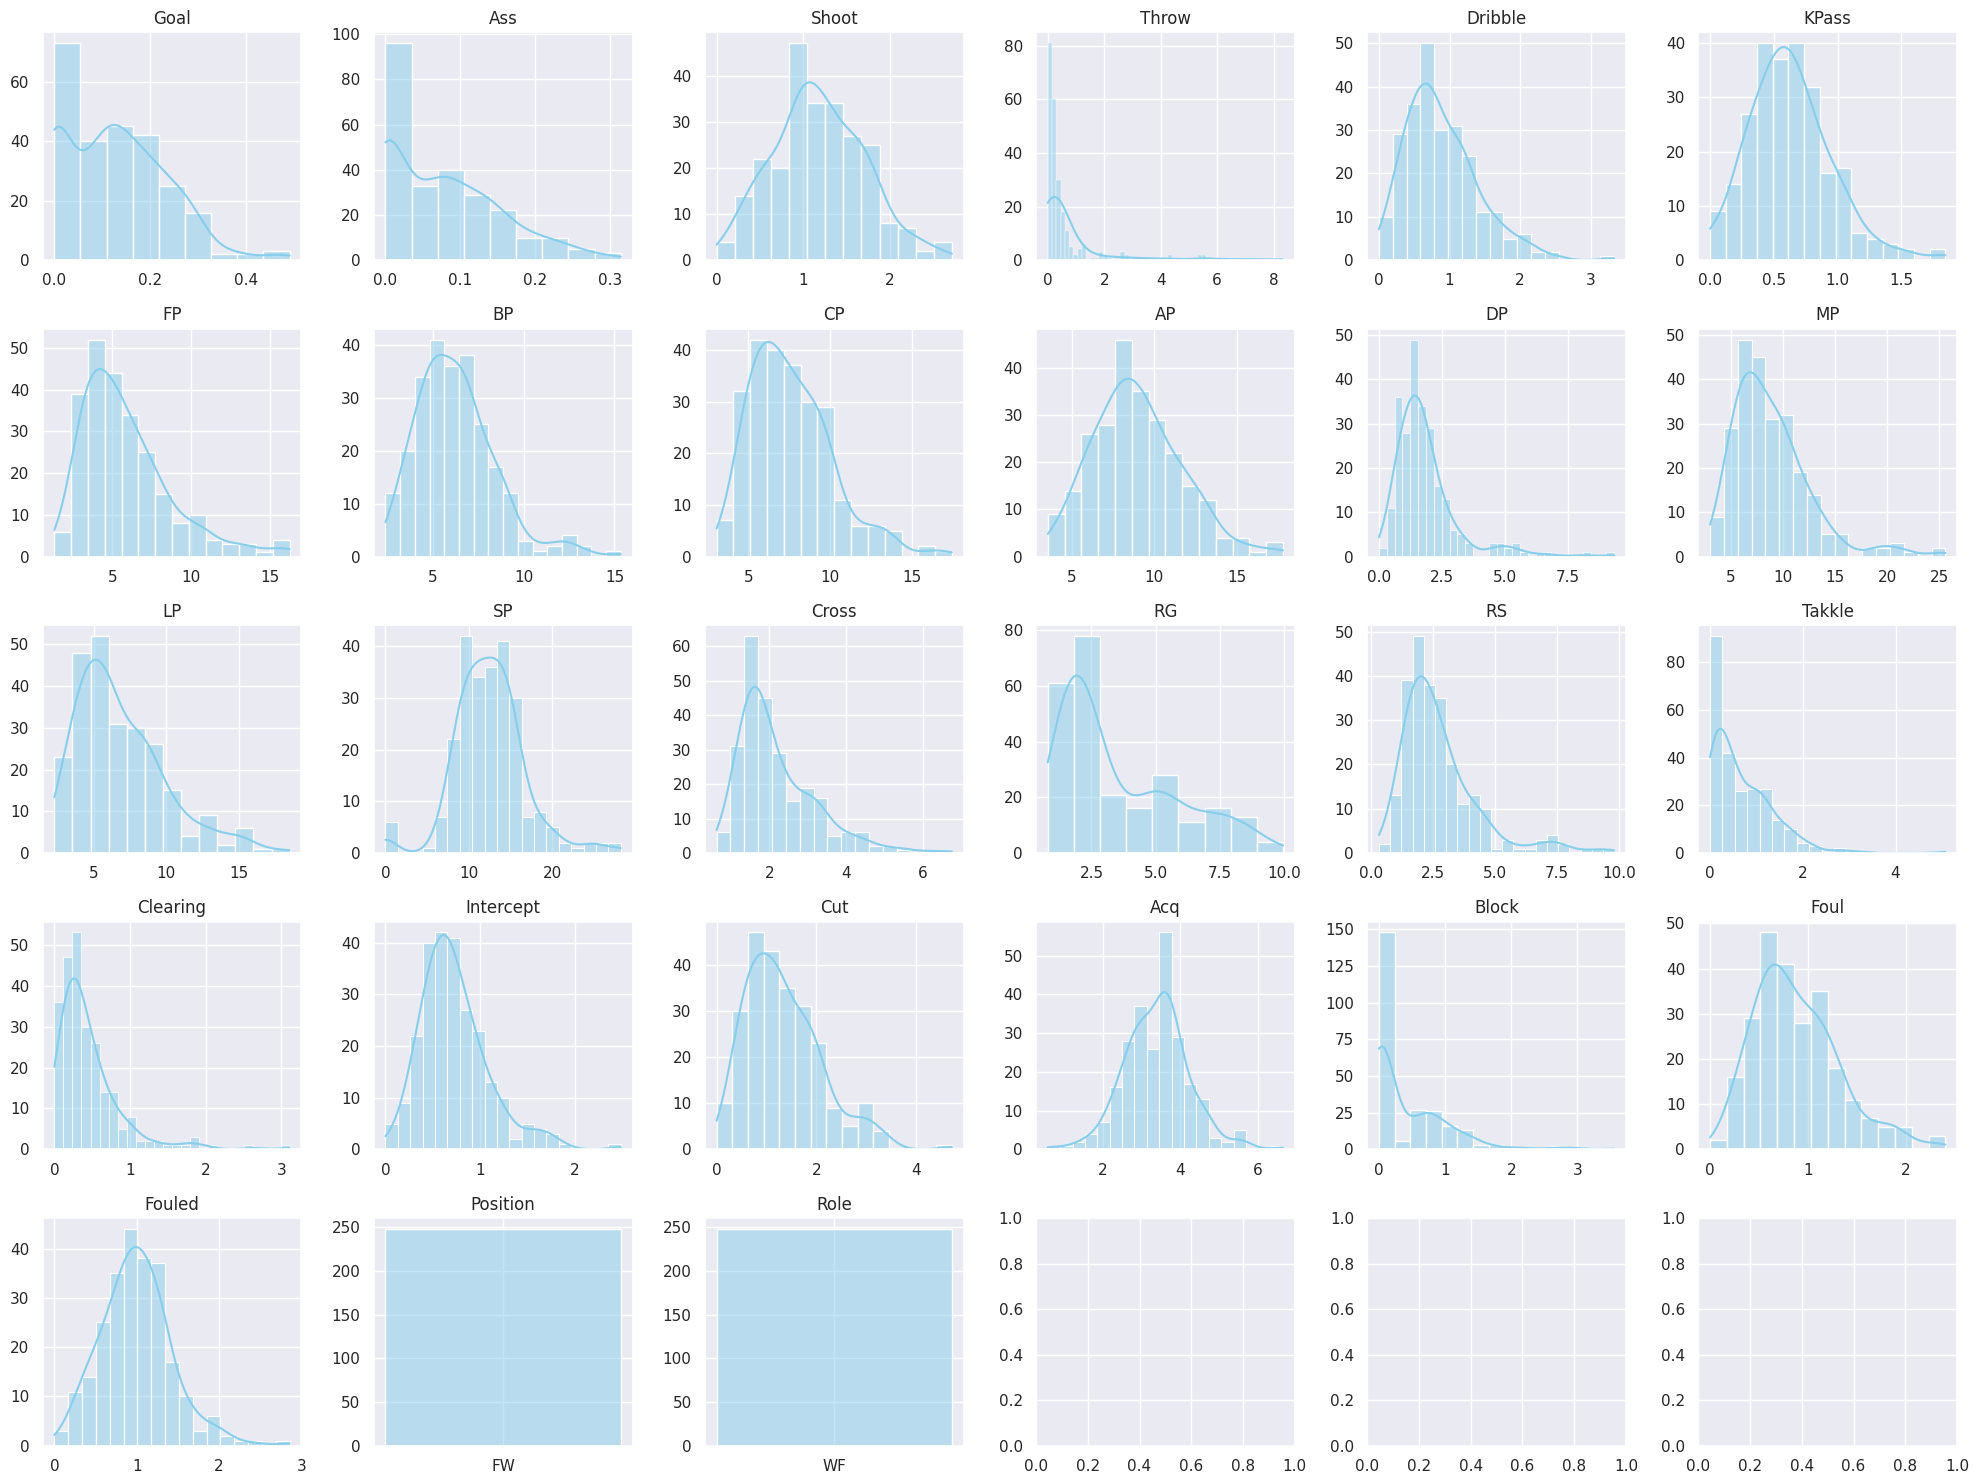

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(WF.columns):
    sns.histplot(data=WF[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

### 정규화

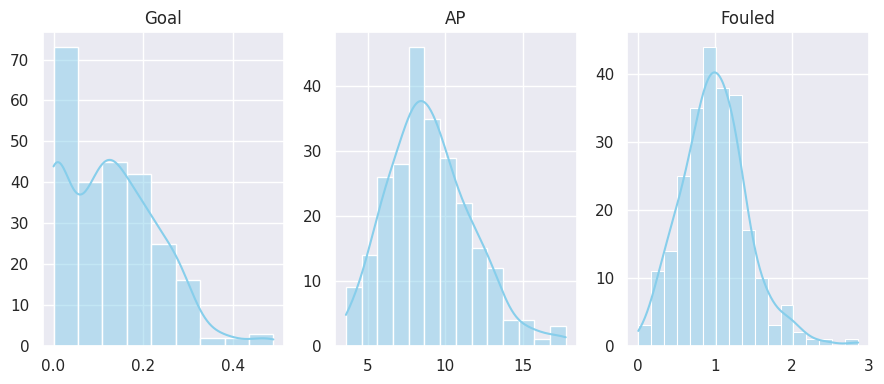

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 4))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(temp_WF.columns):
    sns.histplot(data=temp_WF[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
for i in range(len(temp_WF.columns)):
    if temp_WF.columns[i] == 'Shoot' or temp_WF.columns[i] == 'Fouled':
        continue
    else:
        temp_WF[temp_WF.columns[i]] = temp_WF[temp_WF.columns[i]].apply(sqrt_transform)

<ipython-input-149-2a498d6d7a3d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_WF[temp_WF.columns[i]] = temp_WF[temp_WF.columns[i]].apply(sqrt_transform)


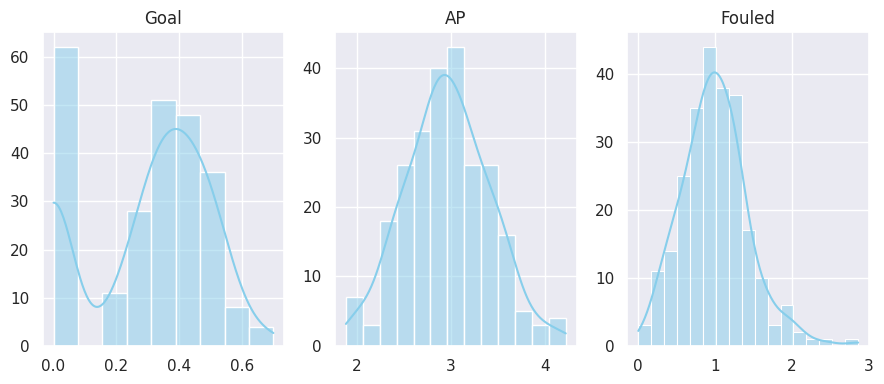

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 4))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(temp_WF.columns):
    sns.histplot(data=temp_WF[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

### 차원축소

- Wide Threat : 상대 수비 라인을 늘리며 패널티 박스로 들어감. 가끔 크로스도 올리지만, 슛 기회를 노린다.
- Unlokcer : 크로스, 전환 패스, 전진패스를 자주 한다. 침투 패스를 넣어주는 선수
- Outlet : 공 소유시 안정적인 플레이를 가져 감. 중원과 골문 근처에서 다수의 터치, 파울을 이끌어냄

In [ ]:
wide_threat = temp_WF[['Goal', 'Ass', 'Dribble', 'Shoot']]
unlocker = temp_WF[['Cross', 'CP', 'FP']]
outlet = temp_WF[['Fouled', 'RG']]

In [ ]:
temp2 = temp_WF
temp2 = temp_WF.drop(columns=temp_WF.columns)

In [ ]:
temp_list = [wide_threat, unlocker, outlet]

for i, pos in zip(temp_list, ['wide_threat', 'unlocker', 'outlet']):
    pca = PCA(n_components=1)

    pca.fit(i)
    pca_result = pca.transform(i)

    # 새로운 변수에 저장
    temp2[f"{pos}_pca"] = pca_result

In [ ]:
temp2

,wide_threat_pca,unlocker_pca,outlet_pca
0,0.678216,-0.499721,-0.378039
2,0.031134,0.247367,-0.606556
19,0.300928,-0.444941,-0.271775
21,0.042950,-0.298512,-0.378291
24,0.381178,-0.593827,-0.231781
...,...,...,...
1673,0.328573,0.041302,0.004526
1677,-0.588066,-0.941769,-0.177198
1694,-0.317020,0.528016,-0.332880
1695,0.360413,0.117122,0.148783


### 군집화

In [ ]:
km_WF = KMeans(n_clusters=3)
km_WF.fit(temp_WF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
temp_WF['Detailed Role'] = km_WF.labels_

<ipython-input-152-bf888ce56e62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_WF['Detailed Role'] = km_WF.labels_


In [ ]:
temp_WF['Detailed Role'] = km_WF.labels_

<ipython-input-153-bf888ce56e62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_WF['Detailed Role'] = km_WF.labels_


In [ ]:
temp_WF[temp_WF['Detailed Role']==0].describe()                                                                                                         #outlet

,Goal,AP,Fouled,Detailed Role
count,62.000000,62.000000,62.000000,62.0
mean,0.277817,2.860326,1.522174,0.0
std,0.224274,0.278125,0.341397,0.0
min,0.000000,1.973102,1.111111,0.0
25%,0.000000,2.733856,1.273250,0.0
50%,0.343924,2.908308,1.426943,0.0
75%,0.476952,3.010541,1.659112,0.0
max,0.682877,3.435590,2.857143,0.0


In [ ]:
temp_WF[temp_WF['Detailed Role']==1].describe()                                                                                                         #wt

,Goal,AP,Fouled,Detailed Role
count,89.000000,89.000000,89.000000,89.0
mean,0.330246,2.578594,0.812733,1.0
std,0.172178,0.264073,0.284394,0.0
min,0.000000,1.886617,0.000000,1.0
25%,0.276465,2.380041,0.670807,1.0
50%,0.371604,2.613259,0.872727,1.0
75%,0.442086,2.809171,0.993631,1.0
max,0.699854,2.986976,1.260504,1.0


In [ ]:
temp_WF[temp_WF['Detailed Role']==2].describe()                                                                                                         #unlocker

,Goal,AP,Fouled,Detailed Role
count,97.000000,97.000000,97.000000,97.0
mean,0.282392,3.388582,0.832391,2.0
std,0.193977,0.280272,0.307911,0.0
min,0.000000,2.993664,0.206186,2.0
25%,0.000000,3.140875,0.566038,2.0
50%,0.318089,3.359981,0.846774,2.0
75%,0.446841,3.551920,1.088435,2.0
max,0.677919,4.219265,1.429787,2.0


In [ ]:
temp_WF['Detailed Role'][temp_WF['Detailed Role']==0] = 'Outlet'
temp_WF['Detailed Role'][temp_WF['Detailed Role']==1] = 'Wide Threat'
temp_WF['Detailed Role'][temp_WF['Detailed Role']==2] = 'Unlocker'
temp_WF

<ipython-input-157-ef8bd647535c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_WF['Detailed Role'][temp_WF['Detailed Role']==0] = 'Outlet'
<ipython-input-157-ef8bd647535c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_WF['Detailed Role'][temp_WF['Detailed Role']==0] = 'Outlet'
<ipython-input-157-ef8bd647535c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_WF['Detailed Role'][temp_WF['Detailed Role']==1] = 'Wide T

,Goal,AP,Fouled,Detailed Role
0,0.682877,2.673997,1.554404,Outlet
2,0.468022,3.051131,0.365075,Unlocker
19,0.406138,2.670959,0.845361,Wide Threat
21,0.373399,2.376297,1.185128,Wide Threat
24,0.000000,1.902496,1.252900,Wide Threat
...,...,...,...,...
1673,0.000000,2.910683,1.643836,Outlet
1677,0.000000,2.652017,1.431535,Outlet
1694,0.219177,3.621394,1.248999,Unlocker
1695,0.537733,3.248725,1.387952,Outlet


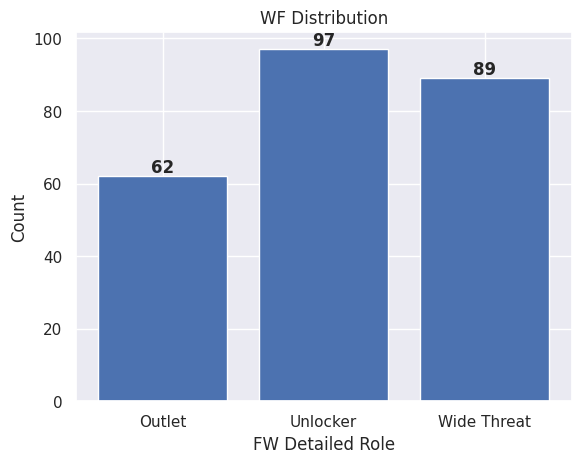

In [ ]:
sns.set(style='darkgrid')

counts = temp_WF['Detailed Role'].value_counts().loc[['Outlet', 'Unlocker', 'Wide Threat']]

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)

for i, v in enumerate(counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.title('WF Distribution')
plt.xlabel('FW Detailed Role')
plt.ylabel('Count')
plt.show()

In [ ]:
temp_WF

,Goal,AP,Fouled,Detailed Role
0,0.682877,2.673997,1.554404,Outlet
2,0.468022,3.051131,0.365075,Unlocker
19,0.406138,2.670959,0.845361,Wide Threat
21,0.373399,2.376297,1.185128,Wide Threat
24,0.000000,1.902496,1.252900,Wide Threat
...,...,...,...,...
1673,0.000000,2.910683,1.643836,Outlet
1677,0.000000,2.652017,1.431535,Outlet
1694,0.219177,3.621394,1.248999,Unlocker
1695,0.537733,3.248725,1.387952,Outlet


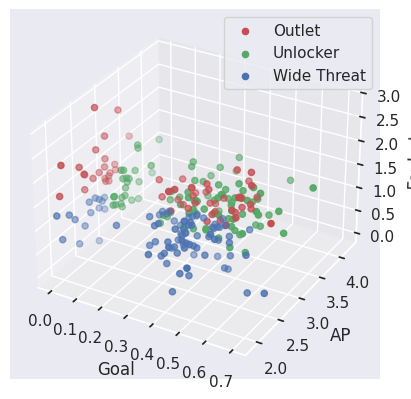

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = temp_WF['Goal']
y = temp_WF['AP']
z = temp_WF['Fouled']
colors = np.where(temp_WF['Detailed Role'] == 'Outlet', 'r', np.where(temp_WF['Detailed Role'] == 'Unlocker', 'g', 'b'))


# 범례 레이블 설정
labels = ['Outlet', 'Unlocker', 'Wide Threat']
# 범례 색상 설정
colormap = {'Outlet': 'r', 'Unlocker': 'g', 'Wide Threat': 'b'}

# 점들을 그리기 위한 for문
for label in labels:
    ax.scatter(x[colors==colormap[label]], y[colors==colormap[label]], z[colors==colormap[label]],
               c=colormap[label], label=label)

ax.set_xlabel('Goal')
ax.set_ylabel('AP')
ax.set_zlabel('Fouled')

# 범례 추가
ax.legend()

plt.show()

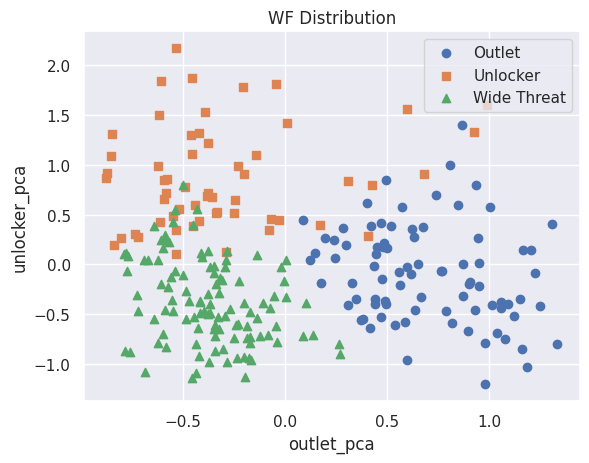

In [ ]:
# 군집 값이 0, 1인 경우마다 별도의 인덱스 추출
marker0 = temp2[temp2['Detailed Role']==0].index
marker1 = temp2[temp2['Detailed Role']==1].index
marker2 = temp2[temp2['Detailed Role']==2].index

# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 Throw, Cross 값 추출.
plt.scatter(x=temp2.loc[marker0, 'outlet_pca'], y=temp2.loc[marker0, 'unlocker_pca'], marker='o', label='Outlet')
plt.scatter(x=temp2.loc[marker1, 'outlet_pca'], y=temp2.loc[marker1, 'unlocker_pca'], marker='s', label='Unlocker')
plt.scatter(x=temp2.loc[marker2, 'outlet_pca'], y=temp2.loc[marker2, 'unlocker_pca'], marker='^', label='Wide Threat')

plt.xlabel('outlet_pca')
plt.ylabel('unlocker_pca')
plt.title('WF Distribution')
plt.legend()
plt.show()

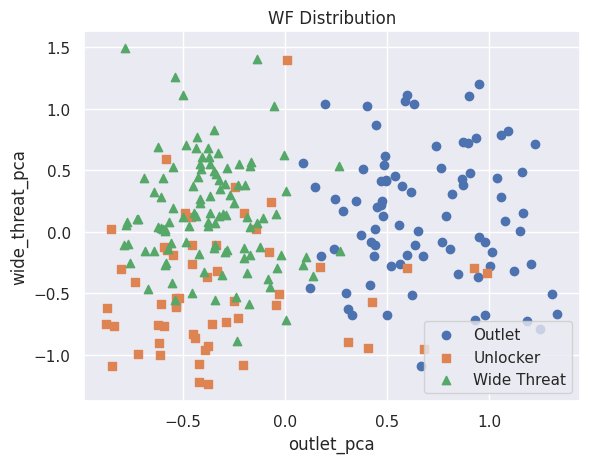

In [ ]:
# 군집 값이 0, 1인 경우마다 별도의 인덱스 추출
marker0 = temp2[temp2['Detailed Role']==0].index
marker1 = temp2[temp2['Detailed Role']==1].index
marker2 = temp2[temp2['Detailed Role']==2].index

# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 Throw, Cross 값 추출.
plt.scatter(x=temp2.loc[marker0, 'outlet_pca'], y=temp2.loc[marker0, 'wide_threat_pca'], marker='o', label='Outlet')
plt.scatter(x=temp2.loc[marker1, 'outlet_pca'], y=temp2.loc[marker1, 'wide_threat_pca'], marker='s', label='Unlocker')
plt.scatter(x=temp2.loc[marker2, 'outlet_pca'], y=temp2.loc[marker2, 'wide_threat_pca'], marker='^', label='Wide Threat')

plt.xlabel('outlet_pca')
plt.ylabel('wide_threat_pca')
plt.title('WF Distribution')
plt.legend()
plt.show()

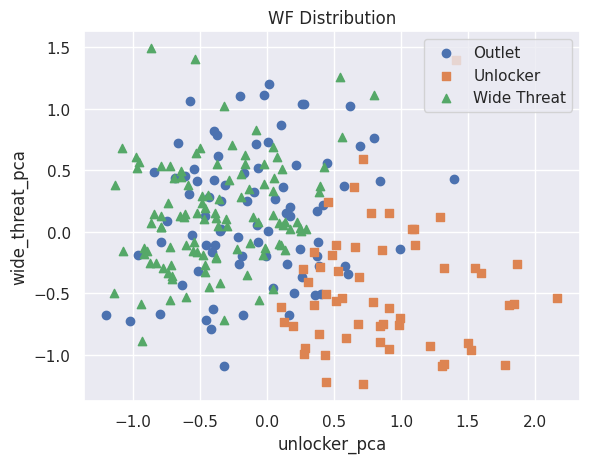

In [ ]:
# 군집 값이 0, 1인 경우마다 별도의 인덱스 추출
marker0 = temp2[temp2['Detailed Role']==0].index
marker1 = temp2[temp2['Detailed Role']==1].index
marker2 = temp2[temp2['Detailed Role']==2].index

# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 Throw, Cross 값 추출.
plt.scatter(x=temp2.loc[marker0, 'unlocker_pca'], y=temp2.loc[marker0, 'wide_threat_pca'], marker='o', label='Outlet')
plt.scatter(x=temp2.loc[marker1, 'unlocker_pca'], y=temp2.loc[marker1, 'wide_threat_pca'], marker='s', label='Unlocker')
plt.scatter(x=temp2.loc[marker2, 'unlocker_pca'], y=temp2.loc[marker2, 'wide_threat_pca'], marker='^', label='Wide Threat')


plt.xlabel('unlocker_pca')
plt.ylabel('wide_threat_pca')
plt.title('WF Distribution')
plt.legend()
plt.show()

In [ ]:
temp_WF

,Goal,AP,Fouled,Detailed Role
0,0.682877,2.673997,1.554404,Outlet
2,0.468022,3.051131,0.365075,Unlocker
19,0.406138,2.670959,0.845361,Wide Threat
21,0.373399,2.376297,1.185128,Wide Threat
24,0.000000,1.902496,1.252900,Wide Threat
...,...,...,...,...
1673,0.000000,2.910683,1.643836,Outlet
1677,0.000000,2.652017,1.431535,Outlet
1694,0.219177,3.621394,1.248999,Unlocker
1695,0.537733,3.248725,1.387952,Outlet


## 실루엣 계수

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
score_samples = silhouette_samples(temp_WF[['Goal', 'AP', 'Fouled']], temp_WF['Detailed Role'])
score_samples.shape

(248,)

In [ ]:
temp_WF['silhouette_coeff'] = score_samples
average_score = silhouette_score(temp_WF[['Goal', 'AP', 'Fouled']], temp_WF['Detailed Role'])
np.round(average_score, 4)

<ipython-input-164-1ecdb48fdfe8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_WF['silhouette_coeff'] = score_samples


0.307

In [ ]:
temp_WF.groupby('Detailed Role')['silhouette_coeff'].mean()

Detailed Role
Outlet         0.273558
Unlocker       0.295112
Wide Threat    0.343136
Name: silhouette_coeff, dtype: float64

In [ ]:
temp_WF

,Goal,AP,Fouled,Detailed Role,silhouette_coeff
0,0.682877,2.673997,1.554404,Outlet,0.299610
2,0.468022,3.051131,0.365075,Unlocker,0.055156
19,0.406138,2.670959,0.845361,Wide Threat,0.511235
21,0.373399,2.376297,1.185128,Wide Threat,0.240729
24,0.000000,1.902496,1.252900,Wide Threat,0.154205
...,...,...,...,...,...
1673,0.000000,2.910683,1.643836,Outlet,0.449210
1677,0.000000,2.652017,1.431535,Outlet,0.270835
1694,0.219177,3.621394,1.248999,Unlocker,0.302372
1695,0.537733,3.248725,1.387952,Outlet,0.141189


In [ ]:
temp_WF['Position'] = 'FW'
temp_WF['Role'] = 'WF'
temp_WF = temp_WF[['Role', 'Detailed Role']]

<ipython-input-167-803db8a9e848>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_WF['Position'] = 'FW'
<ipython-input-167-803db8a9e848>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_WF['Role'] = 'WF'


In [ ]:
temp_WF

,Role,Detailed Role
0,WF,Outlet
2,WF,Unlocker
19,WF,Wide Threat
21,WF,Wide Threat
24,WF,Wide Threat
...,...,...
1673,WF,Outlet
1677,WF,Outlet
1694,WF,Unlocker
1695,WF,Outlet


# 공격수 합치기

In [ ]:
cf = cf.reset_index()
cf

,index,Role,Detailed Role
0,8,CF,Roamer
1,12,CF,Roamer
2,16,CF,Target
3,25,CF,Finisher
4,33,CF,Roamer
...,...,...,...
258,1666,CF,Roamer
259,1678,CF,Target
260,1680,CF,Target
261,1685,CF,Roamer


In [ ]:
b = temp_WF.reset_index()
b

,index,Role,Detailed Role
0,0,WF,Outlet
1,2,WF,Unlocker
2,19,WF,Wide Threat
3,21,WF,Wide Threat
4,24,WF,Wide Threat
...,...,...,...
243,1673,WF,Outlet
244,1677,WF,Outlet
245,1694,WF,Unlocker
246,1695,WF,Outlet


In [ ]:
result_df = pd.concat([cf, b])
result_df = result_df.sort_values(by='index')
result_df = result_df.set_index('index')
result_FW_df = result_df.rename_axis(None)
result_FW_df

,Role,Detailed Role
0,WF,Outlet
2,WF,Unlocker
8,CF,Roamer
12,CF,Roamer
16,CF,Target
...,...,...
1685,CF,Roamer
1691,CF,Finisher
1694,WF,Unlocker
1695,WF,Outlet


In [ ]:
result_FW_df.to_csv('FW.csv')